In [75]:
import numpy as np
import matplotlib.pyplot as plt

In [76]:
NUM_NODES = 5

In [77]:
def plot_mat(mat):
    # Create figure that is smaller then the default
    plt.figure(figsize=(4, 4))
    plt.imshow(mat, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.show()

In [78]:
def plot_three_mats(mat1, mat2, mat3,mat4, title):
    # Make sure the colormap is shared over all subplots
    vmin = min(mat2.min(), mat3.min())
    vmax = max(mat2.max(), mat3.max())
    # Create figure that is smaller then the default
    # plt.figure(figsize=(12, 4))
    f, axs = plt.subplots(1,4, figsize=(12, 4))
    im1 = axs[0].imshow(mat1, cmap='afmhot', interpolation='nearest', vmin=0, vmax=1)
    im2 = axs[1].imshow(mat2, cmap='afmhot', interpolation='nearest', vmin=0, vmax=1)
    im3 = axs[2].imshow(mat3, cmap='afmhot', interpolation='nearest', vmin=0, vmax=1)
    im4 = axs[3].imshow(mat4, cmap='coolwarm', interpolation='nearest', vmin=-1, vmax=1)
    # add colorbar withouth resizing the figure
    f.colorbar(im1, ax=axs[0], shrink=0.55)    
    f.colorbar(im2, ax=axs[1], shrink=0.55)    
    f.colorbar(im3, ax=axs[2], shrink=0.55)    
    f.colorbar(im4, ax=axs[3], shrink=0.55)    
    axs[0].set_title("Adjacency matrix")
    axs[1].set_title("Original attention matrix")
    axs[2].set_title("Adjacency Aware Attention")
    axs[3].set_title("AAA - Original Attention")
    plt.suptitle(f"Adjacency Aware Attention with Factor {title:.2f}")
    plt.show()
   

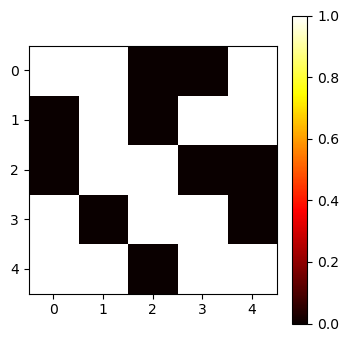

In [79]:
adj_mat = np.random.randint(0, 2, size=(NUM_NODES, NUM_NODES))
np.fill_diagonal(adj_mat, 1)
adj_mat
plot_mat(adj_mat)

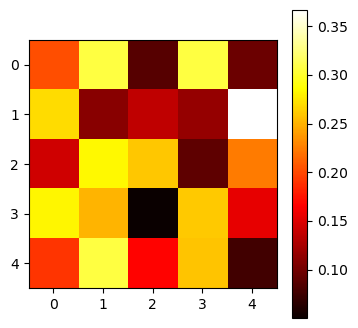

In [80]:
att_mat = np.random.rand(NUM_NODES, NUM_NODES)
att_mat = att_mat/ np.sum(att_mat, axis=1)[:, None]
plot_mat(att_mat)

In [81]:
# Replace all 0s with BETA and all 1s with 1-BETA in adj_mat
def adj_aware_beta(beta):
    corr_mat = np.where(adj_mat == 0, beta, 1-beta)
    corrected_mat = att_mat * corr_mat
    adj_aware_att_mat = corrected_mat/ np.sum(corrected_mat, axis=1, keepdims=True)
    return corr_mat, adj_aware_att_mat

In [82]:
def adj_aware_alpha(alpha):
    adj_aware_att_mat = att_mat * alpha + adj_mat * (1-alpha)
    adj_aware_att_mat = adj_aware_att_mat/ np.sum(adj_aware_att_mat, axis=1, keepdims=True)
    return adj_aware_att_mat

# Version one using $\beta$ * att or (1-$\beta$) * att depending if $e_{i,j} \in A$

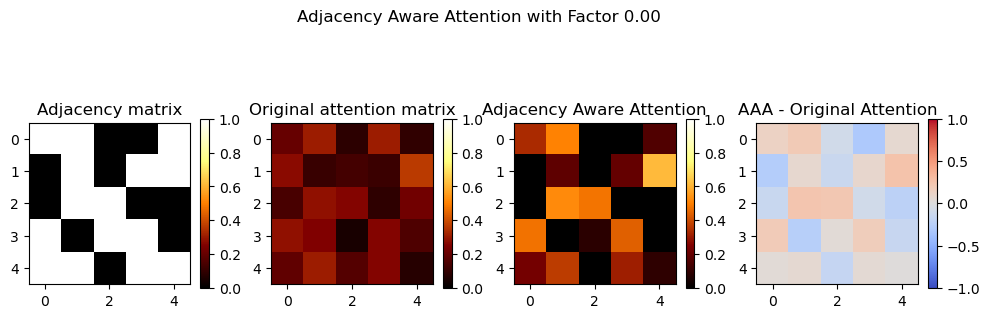

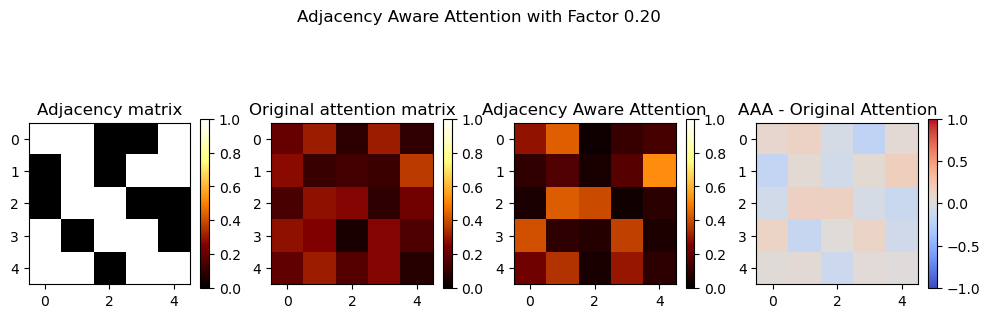

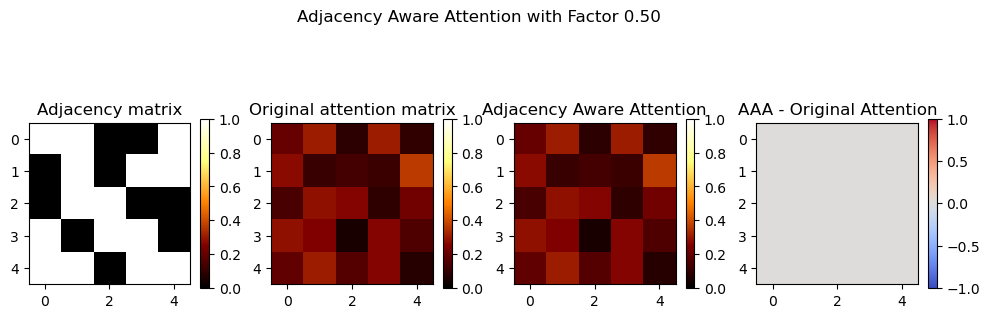

In [83]:
beta = 0
corr_mat, adj_aware_att_mat = adj_aware_beta(beta)
plot_three_mats(adj_mat, att_mat, adj_aware_att_mat, adj_aware_att_mat-att_mat, beta)
beta = 0.2
corr_mat, adj_aware_att_mat = adj_aware_beta(beta)
plot_three_mats(adj_mat, att_mat, adj_aware_att_mat, adj_aware_att_mat-att_mat, beta)
beta = 0.5
corr_mat, adj_aware_att_mat = adj_aware_beta(beta)
plot_three_mats(adj_mat, att_mat, adj_aware_att_mat, adj_aware_att_mat-att_mat, beta)

# Version two using $\alpha$ * att + (1-$\alpha) * A_{i,j}$

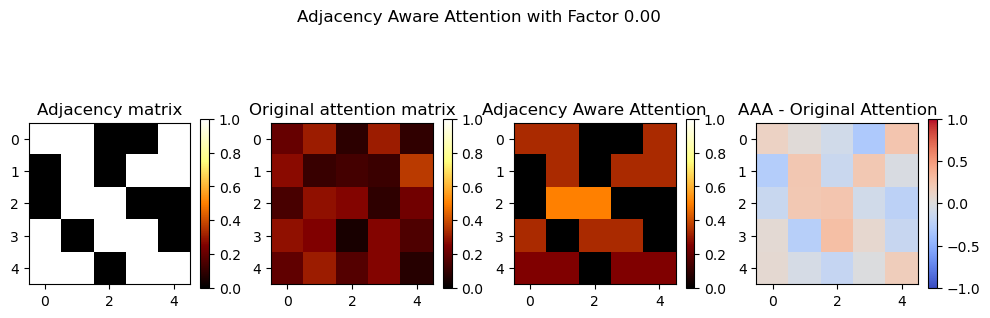

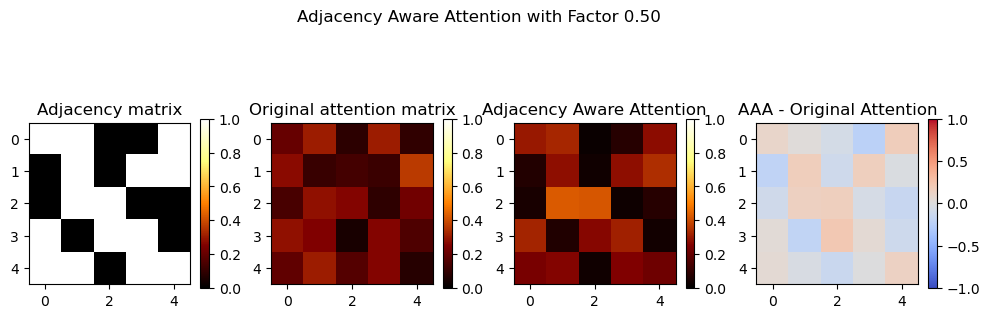

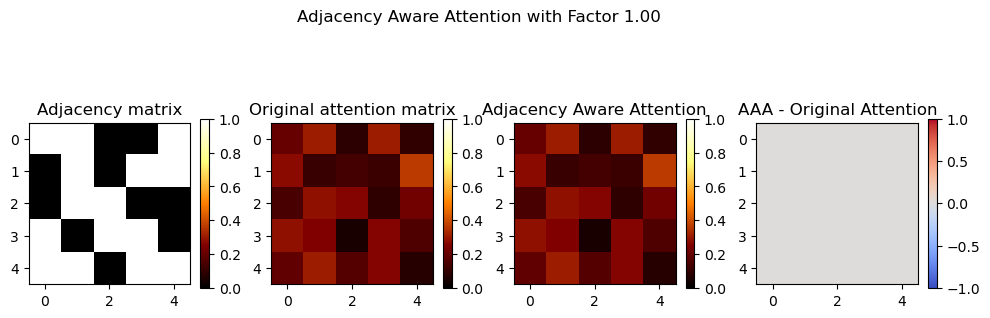

In [84]:
alpha = 0
adj_aware_att_mat = adj_aware_alpha(alpha)
plot_three_mats(adj_mat, att_mat, adj_aware_att_mat, adj_aware_att_mat-att_mat, alpha)
alpha = 0.5
adj_aware_att_mat = adj_aware_alpha(alpha)
plot_three_mats(adj_mat, att_mat, adj_aware_att_mat, adj_aware_att_mat-att_mat, alpha)
alpha = 1
adj_aware_att_mat = adj_aware_alpha(alpha)
plot_three_mats(adj_mat, att_mat, adj_aware_att_mat, adj_aware_att_mat-att_mat, alpha)